# Library Imports

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow as show
import matplotlib.pyplot as plt

import numpy as np
from math import cos, sin

COLOR = (255, 0, 0) # BLUE
THICKNESS = 3

# Hough Circles Method

In [2]:
def hough_circles(canny_img, n_thetas, radius):
  n_rows, n_cols = canny_img.shape

  thetas = np.deg2rad(np.linspace(0, 361, n_thetas))
  acc = np.zeros(canny_img.shape)

  for row_idx in range(n_rows):
    for col_idx in range(n_cols):
      pixel = canny_img[row_idx, col_idx]
      
      if pixel > 0:
        for theta in thetas:
          center_col = int(col_idx - radius * np.cos(theta))
          center_row = int(row_idx - radius * np.sin(theta))
          
          if center_row >= 0 and center_row < n_rows and center_col >= 0 and center_col < n_cols:
            acc[center_row, center_col] += 1

  plt.imshow(acc,cmap="jet",aspect='auto')
  plt.title('Hough Transform')
  plt.xlabel('Angles')
  plt.ylabel('Distance from center')
  plt.show()

  print("Accumulator Shape", acc.shape)
  return acc

# Functions to draw and extract parameter information from accumulator

In [3]:
def convert2tuples(arr_2d):
  return [(arr_2d[i][j], i, j) for i in range(len(arr_2d)) for j in range(len(arr_2d[0]))]

def find_circles(canny_img, n_thetas, radius, threshold):
  return [(center_x, center_y) for n_intersections, center_y, center_x in 
          convert2tuples(hough_circles(canny_img, n_thetas, radius)) if n_intersections > threshold]

In [4]:
def draw_circles(img, centers, radius):
  draw_on = img.copy()
  for center in set(centers):
    draw_on = cv.circle(draw_on, center, radius, COLOR, THICKNESS)
  return draw_on

# Preprocessing the image

In [5]:
def preprocess(img_path):
  img = cv.imread(img_path)
  gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  blur_img = cv.GaussianBlur(gray_img, (11, 11), 0)
  ret, thresh = cv.threshold(blur_img, 120, 255, cv.THRESH_BINARY_INV)
  return cv.Canny(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

(194, 259)


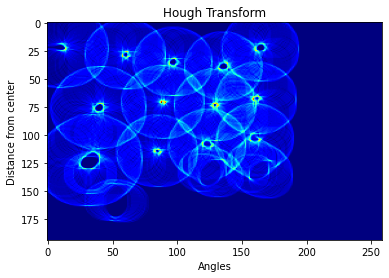

Accumulator Shape (194, 259)
108
(194, 259)


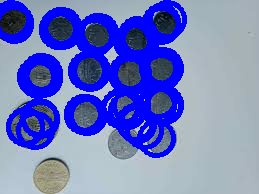

In [11]:
canny = preprocess('/content/coin_img6.jpeg')
radius = 17
print(canny.shape)
centers = find_circles(canny, 1000, radius, 200)
print(len(centers))
print(canny.shape)
output = draw_circles(cv.imread('/content/coin_img6.jpeg'), centers, radius)
show(output)

In [ ]:
canny = preprocess('/content/coin_img4.jpeg')
radius = 63
print(canny.shape)
centers = find_circles(canny, 1000, radius, 120)
print(len(centers))
print(canny.shape)
output = draw_circles(cv.imread('/content/coin_img4.jpeg'), centers, radius)
show(output)

In [ ]:
# radius 40, thresh > 40 img 1-- Good results
# radius 20 thresh 80 img 7 -- Good results
# radius 63 thresh 100 img 4 -- Good results
# 
radius = 63
print(canny.shape)
centers = find_circles(canny, 1000, radius, 100)
print(len(centers))
print(canny.shape)
output = draw_circles(img, centers, radius)
show(output)